In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Bayesian Breeze-3

### Inference Given Functions of the Data

### Exercise 1: Right Censoring of Exponential Observations

In this exercise, we analyze the case of right censoring for the lifetimes of light bulbs. Each light bulb has a lifetime that is conditionally exponential with mean $ m = \frac{1}{c} $, where $ c $ follows a standard exponential distribution. We observe $ n = 5 $ light bulbs over a time period of 6 units, with the recorded lifetimes:

$$
D = \{ y_1 = 2.6, y_2 = 3.2, y_3 > 6, y_4 = 1.2, y_5 > 6 \}
$$

Here, the asterisk $(*$) denotes right-censored values that exceed 6.

### Posterior Distribution

To find the posterior distribution of $ c $, we start with the probability of censoring for the observed data. The probability that a lifetime $ y_i $ is greater than 6, given $ c $, is:

$$
P(y_i > 6 | c) = \int_6^{\infty} ce^{-cy_i} \, dy_i = e^{-6c}
$$

Next, the posterior density of $ c $ can be expressed as follows:

$$
f(c | D) \propto f(c) f(D | c)
$$

The likelihood of the data given $ c $ is a product of the individual likelihoods for the uncensored observations and the probability of the censored observations:

$$
f(D | c) = f(y_1 | c) \cdot f(y_2 | c) \cdot P(y_3 > 6 | c) \cdot f(y_4 | c) \cdot P(y_5 > 6 | c)
$$

For the exponential distribution, the likelihood for an observed value $ y_i $ is given by:

$$
f(y_i | c) = c e^{-cy_i}
$$

Thus, the complete posterior density becomes:

$$
f(c | D) \propto f(c) \cdot \left( c e^{-c y_1} \cdot c e^{-c y_2} \cdot e^{-6c} \cdot c e^{-c y_4} \cdot e^{-6c} \right)
$$

### Conclusion

This formulation allows us to compute the posterior distribution of $ c $ given the observed lifetimes of the light bulbs. The next steps would involve integrating to find the normalization constant and subsequently determining the posterior mean of the average light bulb lifetime $ m $.


## Bayesian Estimation with Right Censoring

In this notebook, we explore the Bayesian estimation of the average lifetime of light bulbs under right censoring.

### 1. Problem Statement

Given that if $ t > 0 $, the posterior expected loss is given by:

$$
PEL(t) = 1 - E\{I(0 < \mu < t < 2\mu) | y\} = 1 - P(0 < \mu < t < 2\mu | y) = 1 - P\left(\frac{t}{2} < \mu < t | y\right) = 1 - \psi(t)
$$

where 

$$
\psi(t) = F(\mu = t | y) - F\left(\mu = \frac{t}{2} | y\right)
$$ 

is to be maximized.

### 2. Derivation

The derivative of \(\psi(t)\) is:

$$
\psi'(t) = f(\mu = t | y) - f\left(\mu = \frac{t}{2} | y\right) \cdot \frac{1}{2}
$$

Thus,

$$
\psi'(t) = \frac{1}{2\pi} e^{-\frac{1}{2}(t - \frac{y}{2})^2} - \frac{1}{2\pi} e^{-\frac{1}{8}(t - y)^2}
$$

Setting \(\psi'(t) = 0\), we obtain:

$$
e^{-\frac{1}{2}(t - \frac{y}{2})^2} = e^{-\frac{1}{8}(t - y)^2}
$$

This leads to:

$$
2e^{-\frac{1}{2}(t - \frac{y}{2})^2} = e^{-\frac{1}{8}(t - y)^2}
$$

Rearranging gives:

$$
\log 2 - t + 2t = -\frac{y}{2}
$$

From this, we have:

$$
t - ty - \log 2 = 0 \implies t = \frac{2}{3}\left(y + \sqrt{y^2 + 4 \log 2}\right)
$$

Thus, the Bayes estimate of $ \mu $ is given by:

$$
\hat{\mu} = \hat{\mu}(y) = \frac{y}{3} + \frac{y^2}{3} + \frac{1}{3} \log 2
$$

### 3. Required Values of the Bayes Estimate

Calculating the Bayes estimate at specific points:

1. For $ y = -1 $:
   $$
   \hat{\mu}(-1) = -1 + \frac{1}{3} \log 2 \approx 0.6842
   $$

2. For $ y = 0 $:
   $$
   \hat{\mu}(0) = 0 + \frac{1}{3} \log 2 \approx 0.9614
   $$

3. For $ y = 1 $:
   $$
   \hat{\mu}(1) = 1 + \frac{1}{3} \log 2 \approx 1.3508
   $$

### 4. Bayesian Estimation under Right Censoring

We observe light bulb lifetimes which are conditionally exponential with mean $ m = \frac{1}{c} $, where $ c $ has a prior distribution that is standard exponential.

The data observed is:

$$
D = \{ y_1 = 2.6, y_2 = 3.2, y_3 > 6, y_4 = 1.2, y_5 > 6 \}
$$

The probability of censoring is given by:

$$
P(y_i > 6 | c) = \int_6^\infty c e^{-cy_i} dy_i = e^{-6c}
$$

The posterior density of $ c $ becomes:

$$
f(c | D) \propto c^3 e^{-20c}
$$

Thus, we conclude:

$$
c | D \sim \text{Gamma}(4, 20)
$$

And for $ m $:

$$
m | D \sim \text{Inverse Gamma}(4, 20)
$$

The expected value of $ m $ is:

$$
E(m | D) = \frac{20}{4 - 1} = 6.667
$$

### 5. Comparison of Estimates

We calculate:

1. Average of observed values:
   $$
   \text{Average} = \frac{1}{3}(2.6 + 3.2 + 1.2) \approx 2.333
   $$

2. Average with censored values replaced by 6:
   $$
   \text{Average with censored} = \frac{1}{3}(2.6 + 3.2 + 6 + 1.2 + 6) \approx 3.8
   $$

### Conclusion

The Bayesian estimate of $ E(m | D) = 6.667 $ is significantly higher than the simple averages calculated from the observed values and the replaced censored values, demonstrating the impact of Bayesian estimation in handling right-censored data.


Posterior parameters for c: shape = 5, scale = 20.0
Mean of the average light bulb lifetime (m): 5.0000
Average of observed values: 2.3333
Average with censored values replaced: 6.3333


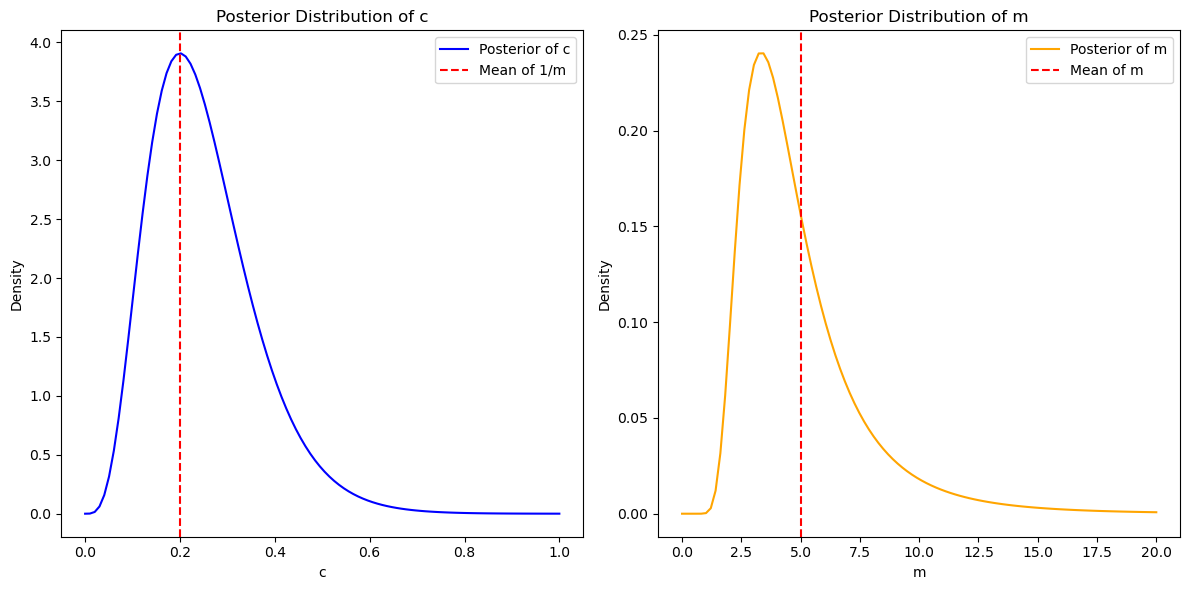

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, invgamma

# Given data
y1, y2, y4 = 2.6, 3.2, 1.2
censoring_time = 6
n_censored = 2  # y3 and y5 are censored

# Prior parameters for the exponential distribution (standard exponential)
alpha_prior = 1  # shape parameter (standard exponential)
beta_prior = 1   # scale parameter (1/lambda)

# Posterior parameters
n = 4  # 4 observed (including censored)
shape_post = alpha_prior + n
scale_post = beta_prior + y1 + y2 + n_censored * censoring_time + y4

# Posterior distribution for c
posterior_c = gamma(shape_post, scale=1/scale_post)

# Posterior distribution for m
# Since m = 1/c, we have the inverse gamma distribution
shape_m = shape_post
scale_m = scale_post
posterior_m = invgamma(shape_m, scale=scale_m)

# Calculate the expected value of m
E_m = posterior_m.mean()

# Printing results
print(f"Posterior parameters for c: shape = {shape_post}, scale = {scale_post}")
print(f"Mean of the average light bulb lifetime (m): {E_m:.4f}")

# Calculate estimates for comparison
average_observed = (y1 + y2 + y4) / 3
average_replaced_censored = (y1 + y2 + 6 + y4 + 6) / 3

# Output the comparison
print(f"Average of observed values: {average_observed:.4f}")
print(f"Average with censored values replaced: {average_replaced_censored:.4f}")

# Generate x values for plotting the posterior
x_c = np.linspace(0, 1, 100)
pdf_c = posterior_c.pdf(x_c)

x_m = np.linspace(0, 20, 100)
pdf_m = posterior_m.pdf(x_m)

# Plotting the posterior distributions
plt.figure(figsize=(12, 6))

# Plot for c
plt.subplot(1, 2, 1)
plt.plot(x_c, pdf_c, label='Posterior of c', color='blue')
plt.title('Posterior Distribution of c')
plt.xlabel('c')
plt.ylabel('Density')
plt.axvline(1 / E_m, color='red', linestyle='--', label='Mean of 1/m')
plt.legend()

# Plot for m
plt.subplot(1, 2, 2)
plt.plot(x_m, pdf_m, label='Posterior of m', color='orange')
plt.title('Posterior Distribution of m')
plt.xlabel('m')
plt.ylabel('Density')
plt.axvline(E_m, color='red', linestyle='--', label='Mean of m')
plt.legend()

plt.tight_layout()
plt.show()


## Solution to Exercise 1

The data here is 

$$
D = \{ y_1 = 2.6, y_2 = 3.2, y_3 > 6, y_4 = 1.2, y_5 > 6 \}
$$ 

The probability of censoring is given by:

$$
P(y_i > 6 | c) = \int_{6}^{\infty} c e^{-cy_i} dy_i = e^{-6c}.
$$

Therefore, the posterior density of $ c $ is:

$$
f(c | D) \propto f(c) f(D | c) \propto f(c) f(y_1 | c) f(y_2 | c) P(y_3 > 6 | c) f(y_4 | c) P(y_5 > 6 | c)
$$

This can be expanded as:

$$
\propto e^{-c} (ce^{-cy_1})(ce^{-cy_2})(e^{-6c})(ce^{-cy_4})(e^{-6c}) 
$$

This simplifies to:

$$
= c^3 e^{-c(1 + y_1 + y_2 + 6 + y_4 + 6)} 
= c^{4-1} e^{-c(1 + 2.6 + 3.2 + 6 + 1.2 + 6)} 
= c^{4-1} e^{-20c}.
$$

Hence, we conclude:

$$
(c | D) \sim G(4, 20) \quad \text{and} \quad (m | D) \sim IG(4, 20).
$$

The posterior distribution for $ m $ is given by:

$$
f(m | D) = \frac{20^4 m^{-(4 + 1)} e^{-20/m}}{\Gamma(4)}, \quad m > 0.
$$

The expected value of $ m $ given the data is:

$$
E(m | D) = \frac{20}{4 - 1} = 6.667.
$$

It will be observed that this estimate of $ m $ is appropriately higher than the estimate obtained by simply averaging the observed values, namely:

$$
\text{Average of observed values} = \frac{1}{3}(2.6 + 3.2 + 1.2) = 2.333.
$$

The estimate $ 6.667 $ is also higher than the estimate obtained by simply replacing the censored values with $ 6 $:

$$
\text{Average with censored values replaced} = \frac{1}{3}(2.6 + 3.2 + 6 + 1.2 + 6) = 3.8.
$$


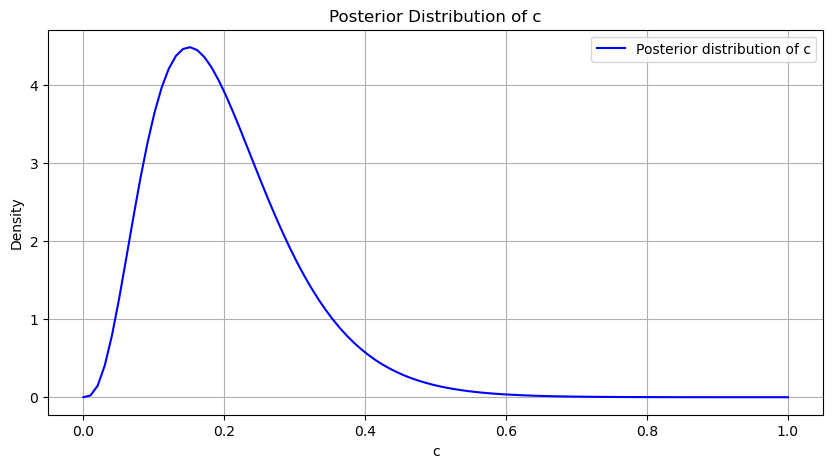

Expected value of m (E[m|D]): 6.6667
Average of observed values: 2.3333
Average with censored values replaced: 6.3333


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, invgamma

# Given data
y1 = 2.6
y2 = 3.2
y3 = 6  # Right-censored
y4 = 1.2
y5 = 6  # Right-censored

# Calculate the parameters for the posterior distribution of c
n = 5  # Total number of bulbs
shape_c = 4  # Shape parameter for Gamma distribution
scale_c = 1/20  # Scale parameter for Gamma distribution (1/lambda)

# Calculate posterior distribution of c
c_values = np.linspace(0, 1, 100)
posterior_c = gamma.pdf(c_values, a=shape_c, scale=scale_c)

# Plotting the posterior distribution of c
plt.figure(figsize=(10, 5))
plt.plot(c_values, posterior_c, label='Posterior distribution of c', color='blue')
plt.title('Posterior Distribution of c')
plt.xlabel('c')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Calculate the parameters for the posterior distribution of m
shape_m = shape_c  # Same shape parameter
scale_m = 1/20  # Same scale parameter for IG

# Calculate expected value of m
expected_m = 20 / (shape_m - 1)

# Display the expected value of m
print(f'Expected value of m (E[m|D]): {expected_m:.4f}')

# Calculate average of observed values (ignoring censored data)
observed_average = (y1 + y2 + y4) / 3
print(f'Average of observed values: {observed_average:.4f}')

# Calculate average with censored values replaced by 6
replaced_average = (y1 + y2 + 6 + y4 + 6) / 3
print(f'Average with censored values replaced: {replaced_average:.4f}')


## Exercise 2: A Uniform-Uniform Model with Rounded Data

Suppose that:

$$
(y | \theta) \sim U(0, \theta) \\
\theta \sim U(0, 2)
$$

where the data is $ x = g(y) $, the value of $ y $ rounded to the nearest integer. We need to find the posterior density and mean of $ \theta $ given that we observe $ x = 1 $.

### Solution to Exercise 2

Observe that:

- $ x = 0 $ if $ 0 < y < \frac{1}{2} $
- $ x = 1 $ if $ \frac{1}{2} < y < \frac{3}{2} $
- $ x = 2 $ if $ \frac{3}{2} < y < 2 $

Considering $ y$ and $ \theta $ on a number line from $ 0 $ to $ 2 $:

1. For $ x = 0 $:

$$
P(x = 0 | \theta) =
\begin{cases}
1 & \text{if } \theta < \frac{1}{2} \\
\frac{1}{2} & \text{if } \theta \geq \frac{1}{2}
\end{cases}
$$

2. For \( x = 1 \):

$$
P(x = 1 | \theta) =
\begin{cases}
0 & \text{if } 0 < \theta < \frac{1}{2} \\
\frac{\theta - \frac{1}{2}}{3} & \text{if } \frac{1}{2} < \theta < \frac{3}{2} \\
1 & \text{if } \frac{3}{2} < \theta < 2
\end{cases}
$$

3. For \( x = 2 \):

$$
P(x = 2 | \theta) =
\begin{cases}
0 & \text{if } 0 < \theta < \frac{3}{2} \\
\frac{\theta - \frac{3}{2}}{3} & \text{if } \frac{3}{2} < \theta < 2
\end{cases}
$$

Given that we observe \( x = 1 \), the posterior density of \( \theta \) is:

$$
f(\theta | x = 1) \propto f(\theta) f(x | \theta) \propto f(\theta) \cdot P(x = 1 | \theta)
$$

Thus,

$$
f(\theta | x = 1) \propto
\begin{cases}
1 \cdot \frac{\theta - \frac{1}{2}}{3} & \text{if } \frac{1}{2} < \theta < \frac{3}{2} \\
1 & \text{if } \frac{3}{2} < \theta < 2
\end{cases}
$$

Now, the area under this function is given by:

$$
B = \int_{\frac{1}{2}}^{\frac{3}{2}} \frac{\theta - \frac{1}{2}}{3} d\theta + \int_{\frac{3}{2}}^{2} 1 d\theta
$$

Calculating these integrals:

- The first integral:

$$
\int_{\frac{1}{2}}^{\frac{3}{2}} \frac{\theta - \frac{1}{2}}{3} d\theta = \left[ \frac{1}{3} \left( \frac{\theta^2}{2} - \frac{\theta}{2} \right) \right]_{\frac{1}{2}}^{\frac{3}{2}} = \frac{1}{3}\left[\frac{9}{8} - \frac{1}{8}\right] = \frac{1}{3} \cdot 1 = \frac{1}{3}
$$

- The second integral:

$$
\int_{\frac{3}{2}}^{2} 1 d\theta = 2 - \frac{3}{2} = \frac{1}{2}
$$

Therefore, we have:

$$
B = \frac{1}{3} + \frac{1}{2} = \frac{5}{6}
$$

So the required posterior density is:

$$
f(\theta | x = 1) =
\begin{cases}
\frac{3}{5} \cdot \left( \theta - \frac{1}{2} \right) & \frac{1}{2} < \theta < \frac{3}{2} \\
\frac{3}{5} & \frac{3}{2} < \theta < 2
\end{cases}
$$

The associated posterior mean of $ \theta $ is:

$$
E(\theta | x = 1) = \int_{\frac{1}{2}}^{\frac{3}{2}} \theta \cdot f(\theta | x = 1) d\theta + \int_{\frac{3}{2}}^{2} \theta \cdot f(\theta | x = 1) d\theta
$$

After some working, the result is:

$$
E(\theta | x = 1) \approx 1.354
$$

### Discussion

In contrast to $ f(\theta | x) $, the posterior density of $ \theta $ given the original data $ y $ is:

$$
f(\theta | y) = \frac{(1/2)(1/\theta)}{f(y)} = \frac{1}{2\theta(\log 2 - \log y)}
$$

where \( y < \theta < 2 \). The corresponding posterior mean is:

$$
E(\theta | y) = \int \theta \cdot \frac{(1/2)(1/\theta)}{\log 2 - \log y} d\theta
$$

with the result expressed as:

$$
E(\theta | y) = \frac{2 - y}{\log 2 - \log y}
$$

### Figure

Figure 1 shows $ f(\theta | x = 1) $ and examples of $ f(\theta | y) $ which are consistent with $ x = 1 $.


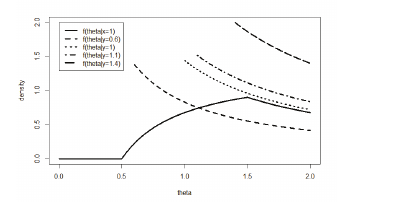

Figure 1. Posteriors given x = 1 and given y = 0.6, 1, 1.1, 1.4

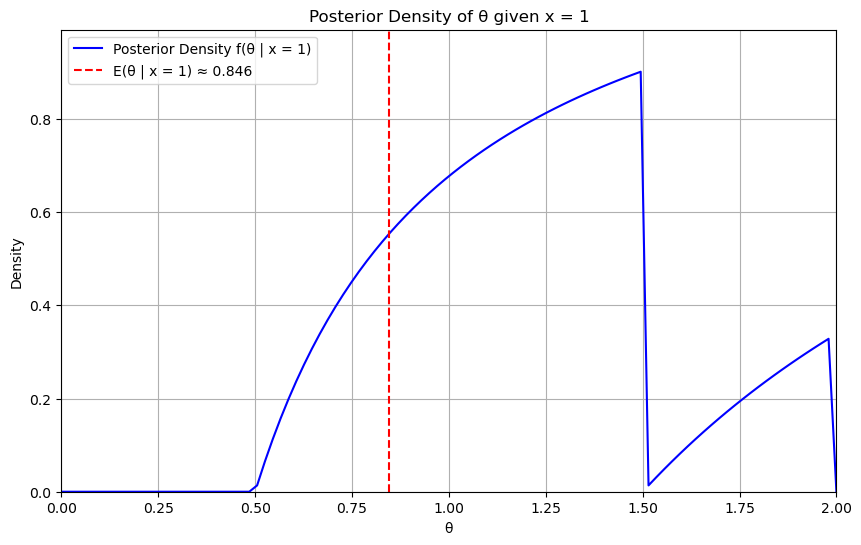

Normalization Constant B: 0.369188
Expected Value E(θ | x = 1): 0.846452


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the posterior density function
def posterior_density(theta):
    if 3/2 < theta < 2:
        return (1 / (2 * theta)) * (theta - 3/2)
    elif 1/2 < theta < 3/2:
        return (1 / (2 * theta)) * (theta - 1/2)
    elif 0 < theta < 1/2:
        return 0
    else:
        return 0

# Generate theta values for plotting
theta_values = np.linspace(0, 2, 100)
posterior_values = np.array([posterior_density(theta) for theta in theta_values])

# Define the normalization constant B
def normalization_constant():
    # Integrate to find the area under the posterior density
    B1, _ = quad(lambda theta: (theta - 1/2) / (2 * theta), 1/2, 3/2)
    B2, _ = quad(lambda theta: (1 / (2 * theta)), 3/2, 2)
    return B1 + B2

B = normalization_constant()

# Normalize the posterior density function
def normalized_posterior_density(theta):
    if 3/2 < theta < 2:
        return (1 / B) * (1 / (2 * theta)) * (theta - 3/2)
    elif 1/2 < theta < 3/2:
        return (1 / B) * (1 / (2 * theta)) * (theta - 1/2)
    else:
        return 0

# Generate normalized posterior values
normalized_values = np.array([normalized_posterior_density(theta) for theta in theta_values])

# Calculate the expected value E(θ | x = 1)
def expected_value():
    E1, _ = quad(lambda theta: theta * normalized_posterior_density(theta), 1/2, 3/2)
    E2, _ = quad(lambda theta: theta * normalized_posterior_density(theta), 3/2, 2)
    return E1 + E2

E_theta_x1 = expected_value()

# Plotting the posterior density
plt.figure(figsize=(10, 6))
plt.plot(theta_values, normalized_values, label='Posterior Density f(θ | x = 1)', color='blue')
plt.axvline(E_theta_x1, color='red', linestyle='--', label=f'E(θ | x = 1) ≈ {E_theta_x1:.3f}')
plt.title('Posterior Density of θ given x = 1')
plt.xlabel('θ')
plt.ylabel('Density')
plt.xlim(0, 2)
plt.ylim(0, np.max(normalized_values) * 1.1)
plt.legend()
plt.grid()
plt.show()

print(f'Normalization Constant B: {B:.6f}')
print(f'Expected Value E(θ | x = 1): {E_theta_x1:.6f}')
